<a href="https://colab.research.google.com/github/geee05/Bio-Signal-Analysis/blob/main/Bio_Signal_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
#%matplotlib inline

## DATA EXPLORATION

In [3]:
train = pd.read_csv('/content/smoking.csv') 
train.tail()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0
55691,55691,M,55,160,65,85.0,0.9,0.7,1.0,1.0,...,15.0,1.0,0.8,26.0,29.0,41.0,Y,0,Y,1


In [4]:
train.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

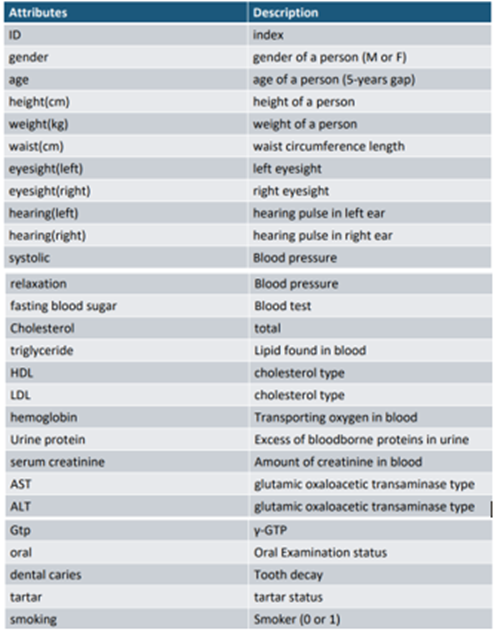

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [6]:
train.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [7]:
train.duplicated().sum()

0

In [8]:
train.isnull().sum().sum()

0

In [9]:
#checking for NaN values
train.isnull().values.any()

False

In [10]:
train.shape

(55692, 27)

 Following are the initial observations made: </br>
 <font color = "green">* __There are 27 columns in total__</font></br>
 <font color = "green">* __There are 55692 entries present in the data__</font></br>
 <font color = "green">* __No null values present and there are no duplicates__</font></br>

## DATA VISUALIZATION

In [11]:
train.groupby('gender')['gender'].count()

gender
F    20291
M    35401
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

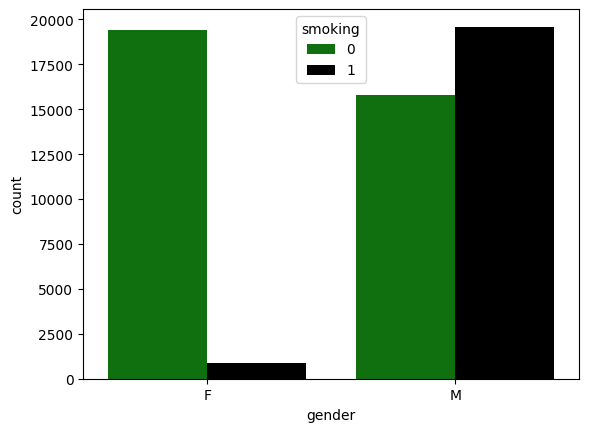

In [12]:
sns.countplot(x=train['gender'],hue=train['smoking'],palette=['green','black'])

<font color = "black"> __: : In the distribution of 20291 females and 35401 males, most of the smokers are men__
</font></br>

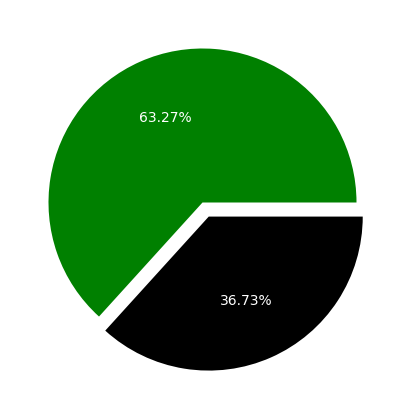

In [13]:
data=train['smoking'].value_counts()
label=['non-smokers','smokers']
plt.figure(figsize=(5,5))
exp = [0, 0.1]
plt.pie(data, labels=label, colors=['green','black'],explode= exp,autopct='%.2f%%',textprops={'color':"w"})
plt.show()

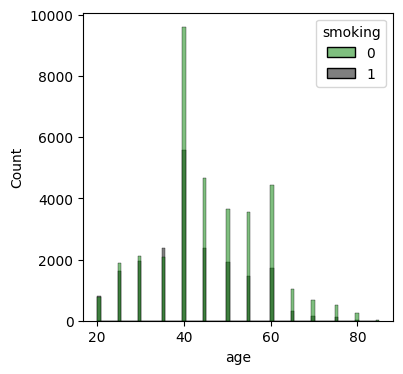

In [14]:
plt.figure(figsize=(4,4))
sns.histplot(x=train['age'],hue=train['smoking'],palette=['green','black'])
plt.show()

## DATA PRE-PROCESSING

In [15]:
#converting categorical variables to numeric type
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

train['gender']=l.fit_transform(train['gender'])
train['tartar']=l.fit_transform(train['tartar'])
train['dental caries']=l.fit_transform(train['dental caries'])


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  int64  
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [17]:
train.drop(['ID','oral'],axis=1,inplace=True)

## FEATURE SELECTION

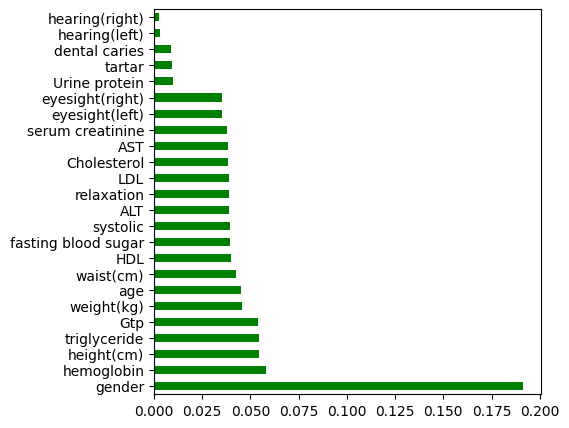

In [18]:
X=train.drop(['smoking'],axis=1)
y=train['smoking']

from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier()
model.fit(X,y)

df=pd.Series(model.feature_importances_,index=X.columns)

plt.figure(figsize=(5,5))
df.nlargest(24).plot(kind='barh',color='green')
plt.show()

In [19]:
#model input 
X=train.drop(['smoking','hearing(left)','hearing(right)','dental caries','tartar','Urine protein'],axis=1)
y=train['smoking']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## MODEL BUILDING : TYPE I

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      6982
           1       0.71      0.72      0.71      4157

    accuracy                           0.78     11139
   macro avg       0.77      0.77      0.77     11139
weighted avg       0.78      0.78      0.78     11139



## MODEL BUILDING : TYPE II

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      6982
           1       0.76      0.80      0.78      4157

    accuracy                           0.83     11139
   macro avg       0.82      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



## MODEL BUILDING : TYPE III

#### OBTAINING THE BEST HYPERPARAMETERS

In [29]:
sample=train.sample(n=100,random_state=66)

In [30]:
x1=sample.drop(['smoking','hearing(left)','hearing(right)','dental caries','tartar','Urine protein'],axis=1)
y1=sample['smoking']

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid= {'C':[0.1,1,10],
             'gamma':[1,0.1,0.01],
             'kernel':['rbf']
            }
grid= GridSearchCV(SVC(),param_grid=param_grid,refit=True,verbose=3)

grid.fit(x1.head(50),y1.head(50))
print(grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.400 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.300 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.400 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

In [32]:
from sklearn.svm import SVC  
svm=SVC(kernel="rbf",C=0.1,gamma=0.1,class_weight='balanced')

svm.fit(x_train,y_train)
y_pred_svm=svm.predict(x_test)

print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.55      0.70      6982
           1       0.56      0.96      0.71      4157

    accuracy                           0.70     11139
   macro avg       0.76      0.76      0.70     11139
weighted avg       0.81      0.70      0.70     11139



# __:: Random Forest Classifier gives the best results with an accuracy of 83%__